In [1]:
# Libraries 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Getting the list of S&P 500 constituents for sp500 calcs
tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4).Ticker.dropna().to_list()
#Getting historical data, adjusted close
df = yf.download(tickers, period = '10y')

[*********************100%%**********************]  504 of 504 completed


3 Failed downloads:
['BRK.B', '-']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')


In [3]:

# Remove nulls and reformat
sp500 = df['Adj Close'].dropna(how= 'all', axis= 1)
sp500_3y = df['Adj Close'].dropna(how= 'all', axis= 1)[-756:]
sp500_1y = df['Adj Close'].dropna(how= 'all', axis= 1)[-252:]
sp500_6m = df['Adj Close'].dropna(how= 'all', axis= 1)[-126:]
NVDA = sp500['NVDA']

In [4]:
#Creating a basket of industry peers + nvidia
industry_stocks =['NVDA', 'INTC', 'AMD', 'QCOM', 'TXN', 'AVGO' ] 
industry_stocks_exc_nvda =['INTC', 'AMD', 'QCOM', 'TXN', 'AVGO' ] 
data = pd.DataFrame(index= industry_stocks)

for industry_stock in industry_stocks:
    info = yf.Ticker(industry_stock).info
    data.loc[industry_stock,
              'Industry'] = info.get('industry')
    data.loc[industry_stock,
              'Sector'] = info.get('sector')
    data.loc[industry_stock,
              'Beta'] = info.get('beta')
    data.loc[industry_stock,
              'ReturnOnAssets'] = info.get('returnOnAssets')
    data.loc[industry_stock,
              'ReturnOnEquity'] = info.get('returnOnEquity')
    data.loc[industry_stock,
              'DebtToEquity'] = info.get('debtToEquity')
    data.loc[industry_stock,
              'CurrentRatio'] = info.get('currentRatio')
""" In this cell block were accessing the YahooFinance database to fetch the figures 
that the requirements ask of us, what is immediately available we store in data"""   
data

,Industry,Sector,Beta,ReturnOnAssets,ReturnOnEquity,DebtToEquity,CurrentRatio
NVDA,Semiconductors,Technology,1.691,0.27228,0.69173,33.149,3.588
INTC,Semiconductors,Technology,0.950,-0.00716,-0.01601,46.253,1.531
AMD,Semiconductors,Technology,1.674,-0.00083,0.00380,5.206,2.188
QCOM,Semiconductors,Technology,1.259,0.10807,0.37071,74.450,2.333
TXN,Semiconductors,Technology,0.992,0.16787,0.45610,67.476,5.693
AVGO,Semiconductors,Technology,1.116,0.14293,0.60312,166.032,2.815


In [5]:
six_month = sp500_6m
one_year = sp500_1y
download_3yn = yf.download(industry_stocks_exc_nvda, period='3y')
three_years_no_nvidia = download_3yn['Adj Close'].dropna(how= 'all', axis= 1)

three_years_NVDA = sp500_3y['NVDA']
one_year_NVDA = three_years_NVDA[-256:]
six_months_NVDA = one_year_NVDA[-126:]


[*********************100%%**********************]  5 of 5 completed


In [6]:
#nvda
nvda_returns= three_years_NVDA.pct_change()
nvda_three_year_cum = ((1 + nvda_returns).cumprod()-1)*100
#all 
three_year_returns_nonvidia= three_years_no_nvidia.pct_change()
three_year_cum_no_nvidia = ((1 + three_year_returns_nonvidia).cumprod()-1)*100



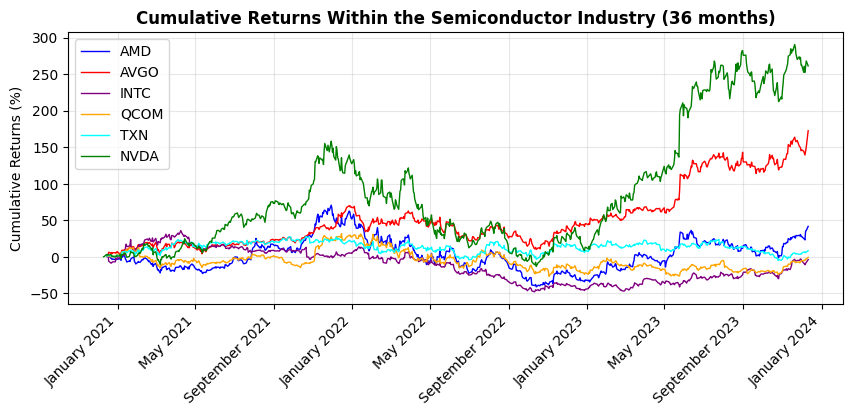

In [7]:
# All plots
ax = three_year_cum_no_nvidia.plot(figsize= (10,4),marker='', linewidth=1, color =['blue', 'red', 'purple', 'orange', 'cyan'])
nvda_three_year_cum.plot(figsize= (10,4),marker='', color= 'green', linewidth=1, legend= True, label= 'NVDA')
# Set the x-axis to display month and year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.xticks(rotation=45)  # Rotate the ticks for better readability
# Set labels and title
plt.ylabel('Cumulative Returns (%)')
plt.title('Cumulative Returns Within the Semiconductor Industry (36 months)', fontweight='bold')
plt.xlabel(None)
plt.grid(alpha=.3)


In [8]:

three_year_returns= sp500_3y.pct_change()
three_year_cum = ((1 + three_year_returns).cumprod()-1)*100
one_year_returns= sp500_1y.pct_change()
one_year_cum = ((1 + one_year_returns).cumprod()-1)*100
six_month_returns= sp500_6m.pct_change()
six_month_cum = ((1 + six_month_returns).cumprod()-1)*100


# Get the last row (final cumulative returns) and find the 10 largest values
cum_3_10_largest = three_year_cum.iloc[-1].nlargest(10)
cum_1_10_largest = one_year_cum.iloc[-1].nlargest(10)
cum_6m_60_largest = six_month_cum.iloc[-1].nlargest(60)

cum_6m_60_largest # rank 60 
cum_1_10_largest # rank 2 
cum_3_10_largest # rank 2

LLY     284.128393
MPC     268.661651
FANG    263.311929
NVDA    261.402709
MRO     251.192354
TRGP    248.223811
DVN     240.671803
ANET    226.481516
STLD    212.379174
NUE     207.176972
Name: 2023-12-11 00:00:00, dtype: float64

In [9]:
# Provided data
nvda_Capital_Expenditure = [-600000000, -489000000, -1130000000, -976000000, -1830000000]
nvda_total_assets = [13290000000, 17320000000, 28790000000, 44190000000, 41180000000]
nvda_rd = [2380000000, 2830000000, 3920000000, 5270000000, 7340000000]

intel_rd = [13580000000, 13360000000, 13560000000, 15190000000, 17530000000]
intel_ta = [127960000000, 136520000000, 153090000000, 168410000000, 182100000000]
intel_cap = [-15180000000, -16210000000, -14260000000, -20330000000, -25050000000]

amd_rd = [1430000000, 1540000000, 1980000000, 2850000000, 5010000000]
amd_ta = [4560000000, 6030000000, 8960000000, 12420000000, 67580000000]
amd_cap = [-163000000, -217000000, -294000000, -301000000, -450000000]

avgo_rd = [3770000000, 470000000, 4970000000, 4850000000, 4920000000]
avgo_ta = [50120000000, 67490000000, 75930000000, 75570000000, 73250000000]
avgo_cap = [-635000000, -432000000, -463000000, -443000000, -424000000]

qcom_rd = [5400000000, 5980000000, 7180000000, 8190000000, 8820000000]
qcom_cap = [-887000000, -1410000000, -1890000000, -2260000000, -1450000000]
qcom_ta = [32960000000, 35590000000, 41240000000, 49010000000, 51040000000]

txn_rd = [1560000000, 1540000000, 1530000000, 1550000000, 1670000000]
txn_ta =[17140000000, 18020000000, 19350000000, 24680000000, 27210000000]
txn_cap = [-1130000000, -847000000, -649000000, -2460000000, -2800000000]

# Calculating R&D/Total Assets and CapEx/Total Assets for each stock
def calculate_ratios(capex, total_assets, rd):
    capex_ta_ratio = [x/y for x, y in zip(capex, total_assets)]
    rd_ta_ratio = [x/y for x, y in zip(rd, total_assets)]
    return capex_ta_ratio, rd_ta_ratio

# Nvidia
nvda_capex_ta, nvda_rd_ta = calculate_ratios(nvda_Capital_Expenditure, nvda_total_assets, nvda_rd)

# Intel
intel_capex_ta, intel_rd_ta = calculate_ratios(intel_cap, intel_ta, intel_rd)

# AMD
amd_capex_ta, amd_rd_ta = calculate_ratios(amd_cap, amd_ta, amd_rd)

# Broadcom (AVGO)
avgo_capex_ta, avgo_rd_ta = calculate_ratios(avgo_cap, avgo_ta, avgo_rd)

# Qualcomm (QCOM)
qcom_capex_ta, qcom_rd_ta = calculate_ratios(qcom_cap, qcom_ta, qcom_rd)

# Texas Instruments (TXN)
txn_capex_ta, txn_rd_ta = calculate_ratios(txn_cap, txn_ta, txn_rd)

(nvda_capex_ta, nvda_rd_ta, intel_capex_ta, intel_rd_ta, amd_capex_ta, amd_rd_ta, 
 avgo_capex_ta, avgo_rd_ta, qcom_capex_ta, qcom_rd_ta, txn_capex_ta, txn_rd_ta)


([-0.045146726862302484,
  -0.028233256351039262,
  -0.03924973949287947,
  -0.02208644489703553,
  -0.044439048081593005],
 [0.17908201655379985,
  0.16339491916859122,
  0.136158388329281,
  0.11925775062231274,
  0.17824186498300146],
 [-0.11863082213191622,
  -0.1187371813653677,
  -0.09314782154288327,
  -0.1207172970726204,
  -0.13756177924217464],
 [0.1061269146608315,
  0.09786111924992676,
  0.08857534783460709,
  0.09019654414820973,
  0.09626578802855573],
 [-0.03574561403508772,
  -0.035986733001658375,
  -0.0328125,
  -0.024235104669887278,
  -0.006658774785439479],
 [0.31359649122807015,
  0.25538971807628524,
  0.22098214285714285,
  0.22946859903381642,
  0.07413435927789287],
 [-0.012669592976855546,
  -0.0064009482886353535,
  -0.006097721585671013,
  -0.00586211459573905,
  -0.0057883959044368605],
 [0.075219473264166,
  0.006963994665876426,
  0.0654550243645463,
  0.0641789069736668,
  0.06716723549488055],
 [-0.026911407766990292,
  -0.039617870188255126,
  -0.045

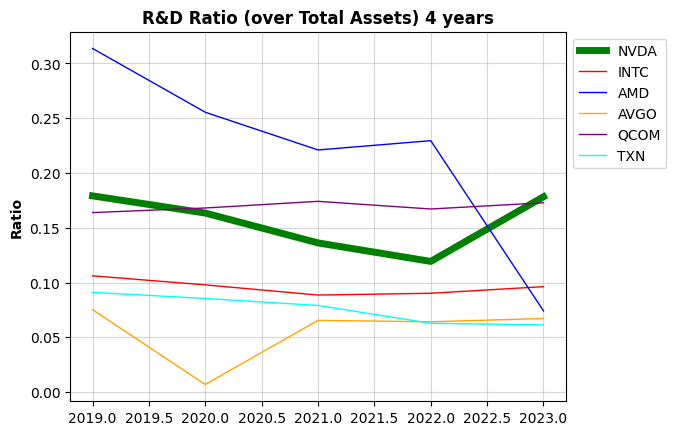

In [33]:
years = (2019,2020,2021,2022,2023)

# Creating separate DataFrames for Capex_ta and rd_ta
df_capex_ta = pd.DataFrame({
    "NVDA": nvda_capex_ta,
    "INTC": intel_capex_ta,
    "AMD": amd_capex_ta,
    "AVGO": avgo_capex_ta,
    "QCOM": qcom_capex_ta,
    "TXN": txn_capex_ta
}, index=years)

df_rd_ta = pd.DataFrame({
    "NVDA": nvda_rd_ta,
    "INTC": intel_rd_ta,
    "AMD": amd_rd_ta,
    "AVGO": avgo_rd_ta,
    "QCOM": qcom_rd_ta,
    "TXN": txn_rd_ta
}, index=years)



colors = ['green', 'red', 'blue', 'orange', 'purple', 'cyan']
# Plotting each line
for i, column in enumerate(df_rd_ta.columns):
    # NVDA gets a bolder line
    if column == 'NVDA':
        df_rd_ta[column].plot(color=colors[i], lw=5, label=column)
    else:
        df_rd_ta[column].plot(color=colors[i], lw=1, label=column)



plt.title('R&D Ratio (over Total Assets) 4 years', fontweight='bold')
plt.ylabel('Ratio',fontweight= 'bold')
plt.legend(loc='upper left')
plt.grid(alpha=.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  

plt.show()

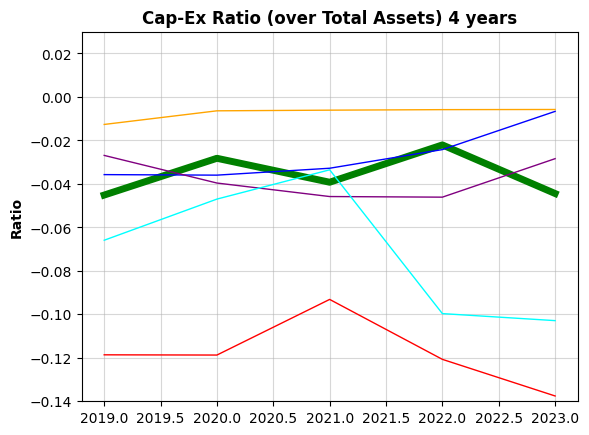

In [34]:

colors = ['green', 'red', 'blue', 'orange', 'purple', 'cyan']


# Plotting each line
for i, column in enumerate(df_capex_ta.columns):
    # NVDA gets a bolder line
    if column == 'NVDA':
        df_capex_ta[column].plot(color=colors[i], lw=5, label=column)
    else:
        df_capex_ta[column].plot(color=colors[i], lw=1, label=column)


plt.title('Cap-Ex Ratio (over Total Assets) 4 years', fontweight='bold')
plt.ylabel('Ratio',fontweight= 'bold')
plt.ylim(-.14, 0.03)
plt.grid(alpha=.5)

plt.show()